# Descriptive analyis: First Week

In [176]:
%matplotlib inline
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code"></form>''')

In [177]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models, similarities
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import re
from collections import Counter
import numpy as np

In [178]:
df = pd.read_csv('data/first_week.csv')
df.columns = map(str.lower, df.columns)
df = df.rename(columns = {'folio2' : 'id'})

# Text: The best of being outside

In [179]:
df['best'] = (df.p1_1.astype(str) + ' ' + df.p1_2.astype(str) + ' ' +
              df.p1_3.astype(str) + ' ' + df.p1_4.astype(str) + ' ' + df.p1_5.astype(str))

In [180]:
text = df.best.str.cat(sep = ' ').lower()
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'nan', '', text)

In [181]:
stop = stopwords.words('spanish')

In [182]:
stop.extend(['sido', 'pude', 'mas', 'poder'])

In [183]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

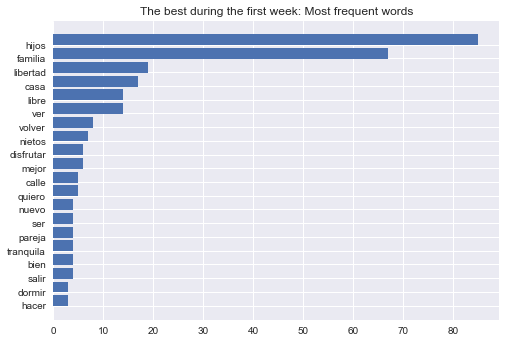

In [184]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('The best during the first week: Most frequent words');

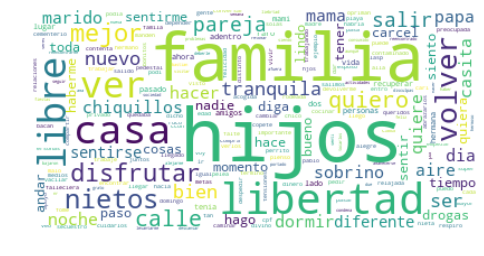

In [185]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

# Text: The most difficult of being outside



In [186]:
df['difficult'] = (df.p2_1.astype(str) + ' ' + df.p2_2.astype(str) + ' ' +
              df.p2_3.astype(str) + ' ' + df.p2_4.astype(str) + ' ' + df.p2_5.astype(str))

In [187]:
text = df.difficult.str.cat(sep = ' ').lower()
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'droga\b', 'drogas', text)
text = re.sub(r'nan', '', text)

In [188]:
stop = stopwords.words('spanish')
stop.extend(['sido', 'pude', 'mas', 'poder'])

In [189]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

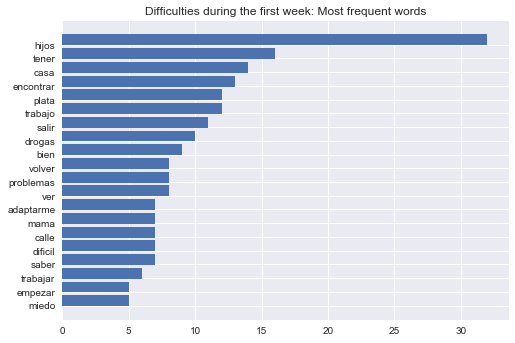

In [190]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('Difficulties during the first week: Most frequent words');

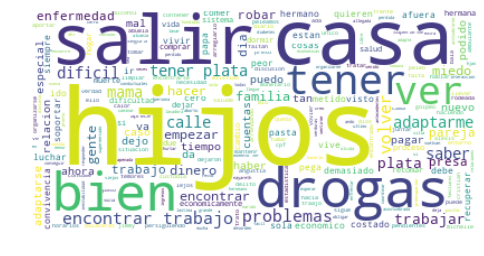

In [191]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

# Time/Day of release

A lot of records without hour of release (almost 50%). 

In [192]:
#df.p8_hora.value_counts()
#df.p8_hora.isnull().value_counts()

In [193]:
# formatting date of release
df['day'] = df.p7_dia.astype(str)
df['month'] = df.p7_mes.astype(str)
df['year'] = df.p7_anio.astype(str)

df['day'] = df.day.replace('-99', None)
df['month'] = df.month.replace('-99', None)
df['year'] = df.year.replace(['-9999','9999'], None)

In [194]:
df['release']  = pd.to_datetime(df.month+'/'+df.day+'/'+df.year+' '+df.p8_hora, errors = 'coerce')

In [195]:
df = df.set_index(['release'])

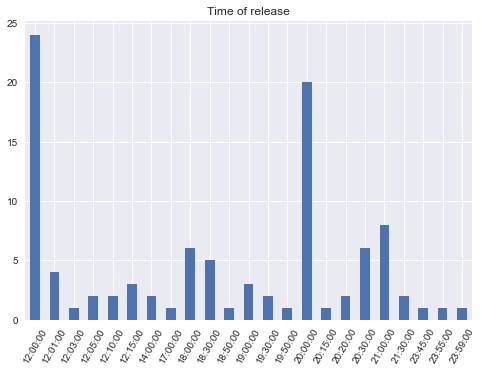

In [196]:
# plot hour of release
df.groupby(df.index.time).id.count().plot(kind = 'bar')
plt.title('Time of release')
plt.xticks(rotation = 60);

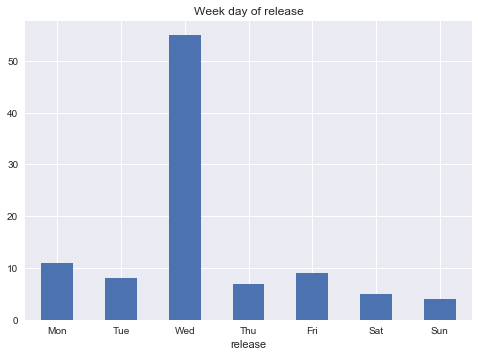

In [197]:
# plot week day 
df.groupby(df.index.dayofweek).id.count().plot(kind = 'bar')
wdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.xticks(df.groupby(df.index.dayofweek).id.count().index, wdays, rotation = 0)
plt.title('Week day of release');